In [1]:
#Importing all the required libraries for the project
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn import metrics
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt


In [2]:
#Loading the data and getting its head()
data = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
#Getting the shape of data
data.shape

(5000, 14)

In [4]:
#Creating a copy of original dataset
cdata = data.copy(deep=True)

In [5]:
#Checking for null value
cdata.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [6]:
#Data type of all the attributes
cdata.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [7]:
cols = list(cdata.columns)
cols

['ID',
 'Age',
 'Experience',
 'Income',
 'ZIP Code',
 'Family',
 'CCAvg',
 'Education',
 'Mortgage',
 'Personal Loan',
 'Securities Account',
 'CD Account',
 'Online',
 'CreditCard']

In [8]:
#Dropping ID and ZIP Code column as they are not needed for claasification problems
drop_cols = ['ID','ZIP Code']
cdata = cdata.drop(drop_cols, axis=1)

In [9]:
cdata.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [10]:
#Replacing categorical values with actual name
cdata['Education'] = cdata['Education'].replace({1: 'Undergrad', 2: 'Graduate', 3: 'Profssional'})
cdata.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,Undergrad,0,0,1,0,0,0
1,45,19,34,3,1.5,Undergrad,0,0,1,0,0,0
2,39,15,11,1,1.0,Undergrad,0,0,0,0,0,0
3,35,9,100,1,2.7,Graduate,0,0,0,0,0,0
4,35,8,45,4,1.0,Graduate,0,0,0,0,0,1


In [11]:
#Creating dummies for categorical column
cdata = pd.get_dummies(cdata, columns=['Education'])
cdata.head()

,Age,Experience,Income,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education_Graduate,Education_Profssional,Education_Undergrad
0,25,1,49,4,1.6,0,0,1,0,0,0,0,0,1
1,45,19,34,3,1.5,0,0,1,0,0,0,0,0,1
2,39,15,11,1,1.0,0,0,0,0,0,0,0,0,1
3,35,9,100,1,2.7,0,0,0,0,0,0,1,0,0
4,35,8,45,4,1.0,0,0,0,0,0,1,1,0,0


In [12]:
#Get the overall description of dataset
cdata.describe()

,Age,Experience,Income,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education_Graduate,Education_Profssional,Education_Undergrad
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,2.396400,1.937938,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000,0.280600,0.300200,0.419200
std,11.463166,11.467954,46.033729,1.147663,1.747659,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637,0.449337,0.458391,0.493478
min,23.000000,-3.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,1.000000,0.700000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,2.000000,1.500000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,30.000000,98.000000,3.000000,2.500000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000
max,67.000000,43.000000,224.000000,4.000000,10.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
#Finding the correleation
cdata.corr()

,Age,Experience,Income,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education_Graduate,Education_Profssional,Education_Undergrad
Age,1.000000,0.994215,-0.055269,-0.046418,-0.052012,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681,-0.016264,0.045838,-0.027770
Experience,0.994215,1.000000,-0.046574,-0.052563,-0.050077,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967,-0.018197,0.020967,-0.002907
Income,-0.055269,-0.046574,1.000000,-0.157501,0.645984,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385,-0.128364,-0.108878,0.218019
Family,-0.046418,-0.052563,-0.157501,1.000000,-0.109275,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588,0.139201,-0.008744,-0.118628
CCAvg,-0.052012,-0.050077,0.645984,-0.109275,1.000000,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689,-0.090366,-0.080413,0.156979
Mortgage,-0.012539,-0.010582,0.206806,-0.020445,0.109905,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231,-0.031806,-0.014942,0.042841
Personal Loan,-0.007726,-0.007413,0.502462,0.061367,0.366889,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802,0.071491,0.090212,-0.148894
Securities Account,-0.000436,-0.001232,-0.002616,0.019994,0.015086,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028,0.005134,-0.012421,0.006863
CD Account,0.008043,0.010353,0.169738,0.014110,0.136534,0.089311,0.316355,0.317034,1.000000,0.175880,0.278644,0.006089,0.009780,-0.014630
Online,0.013702,0.013898,0.014206,0.010354,-0.003611,-0.005995,0.006278,0.012627,0.175880,1.000000,0.004210,0.020590,-0.023837,0.003394


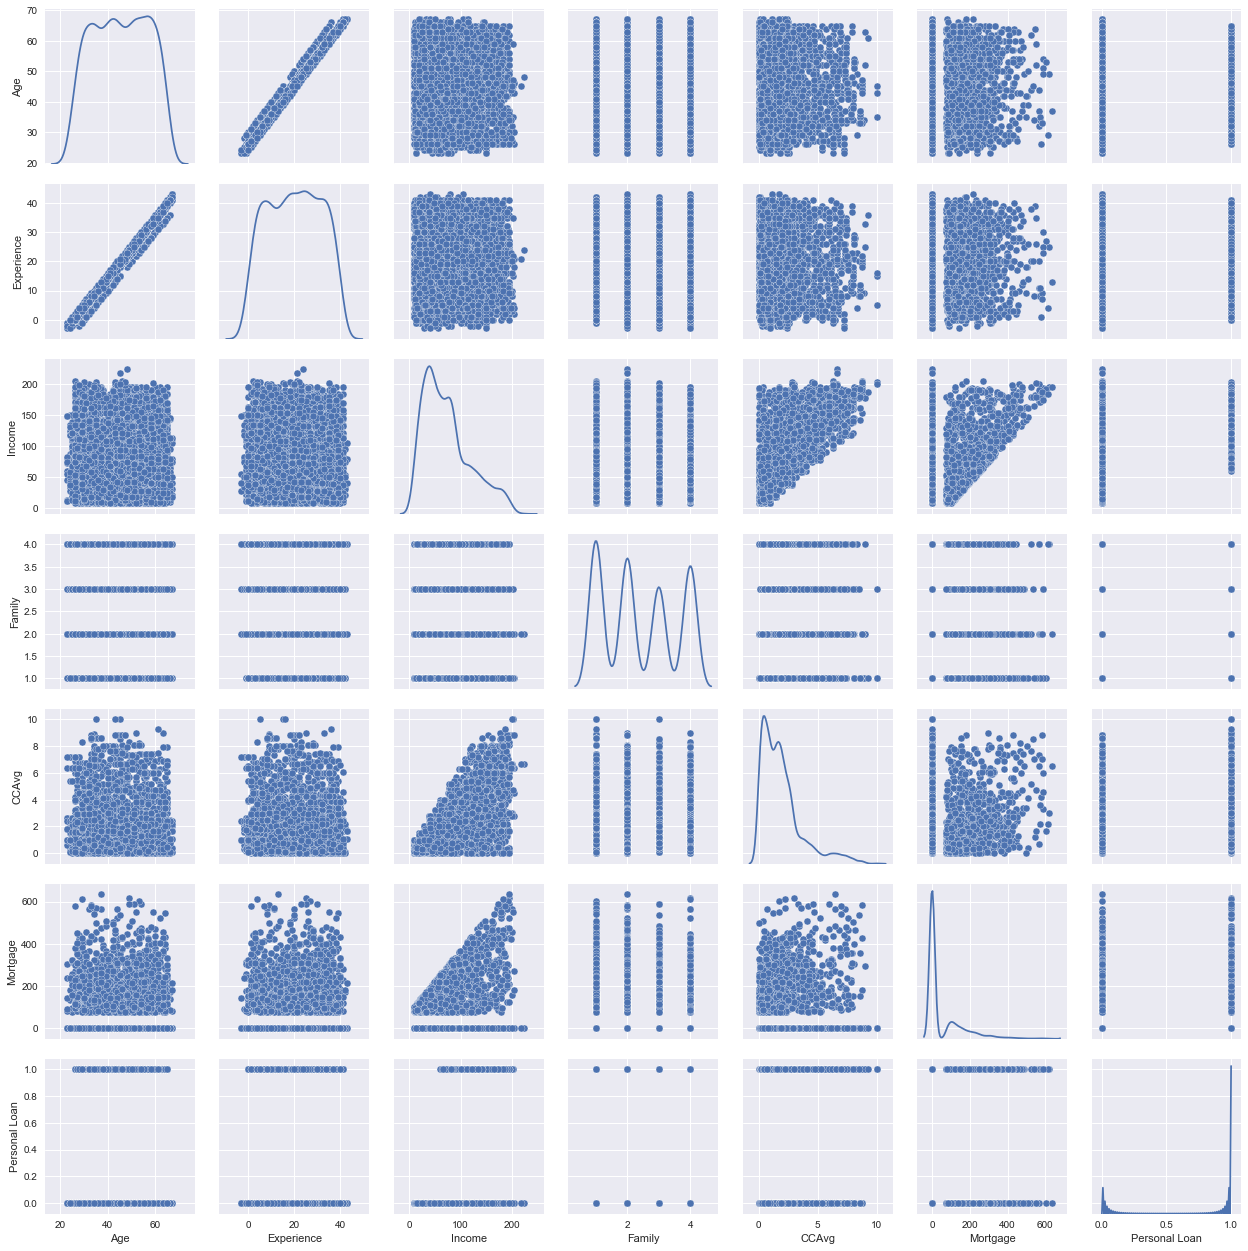

In [14]:
#Get the overall distribution picture
sns.pairplot(cdata.iloc[:,0:7],diag_kind='kde')

In [15]:
#From above information, we are not finding much correlation between attributes and data distibution are wide spread with numerical values

In [16]:
#Checking the distibution of target variable Personal loan
cdata['Personal Loan'].value_counts(normalize=True)

0    0.904
1    0.096
Name: Personal Loan, dtype: float64

In [17]:
#From above information it is found that only 9% are intrested in availing Personal Loan. The distribution or spilt is not even with respect to overall data.

In [18]:
#Changing datatype of Personal Loan, Securities Account, CD Account, Online and CreditCard column as Category
cdata['Personal Loan'] = cdata['Personal Loan'].astype('category')
cdata['Securities Account'] = cdata['Securities Account'].astype('category')
cdata['CD Account'] = cdata['CD Account'].astype('category')
cdata['Online'] = cdata['Online'].astype('category')
cdata['CreditCard'] = cdata['CreditCard'].astype('category')

In [19]:
cdata.dtypes

Age                         int64
Experience                  int64
Income                      int64
Family                      int64
CCAvg                     float64
Mortgage                    int64
Personal Loan            category
Securities Account       category
CD Account               category
Online                   category
CreditCard               category
Education_Graduate          uint8
Education_Profssional       uint8
Education_Undergrad         uint8
dtype: object

In [20]:
###Building LOGISTIC REGRESSION MODEL ####

In [21]:
#Splitting traing and test data
X = cdata.drop(['Education_Undergrad','Personal Loan'], axis = 1)
Y = cdata['Personal Loan']

#X = pd.get_dummies(X)
X.head()

,Age,Experience,Income,Family,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Education_Graduate,Education_Profssional
0,25,1,49,4,1.6,0,1,0,0,0,0,0
1,45,19,34,3,1.5,0,1,0,0,0,0,0
2,39,15,11,1,1.0,0,0,0,0,0,0,0
3,35,9,100,1,2.7,0,0,0,0,0,1,0
4,35,8,45,4,1.0,0,0,0,0,1,1,0


In [22]:
#Assigning train and test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

In [23]:
logisticReg = LogisticRegression(class_weight='balanced')

In [24]:
logisticReg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [25]:
#Score of the train and test data
score = logisticReg.score(X_train, y_train)
score = logisticReg.score(X_test, y_test)
print('Train data score:',score)
print('Test data score:',score)

Train data score: 0.9026666666666666
Test data score: 0.9026666666666666


In [26]:
#Predict for train dataset
pred_train = logisticReg.predict(X_train)

#from sklearn.preprocessing import binarize
#pred_train = binarize([pred_train], 0.)[0]
#print(pred_train[0:10])
from sklearn.metrics import classification_report,confusion_matrix
mat_train = confusion_matrix(y_train,pred_train)

print("confusion matrix = \n",mat_train)

confusion matrix = 
 [[2862  307]
 [  30  301]]


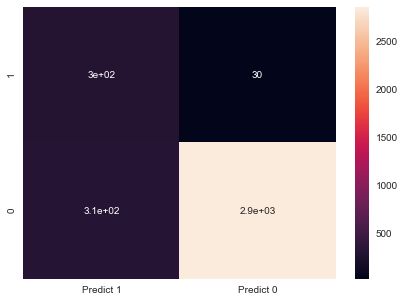

In [27]:
cm=metrics.confusion_matrix(y_train, pred_train, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [28]:
#Predict for test dataset
pred_test = logisticReg.predict(X_test)
mat_test = confusion_matrix(y_test,pred_test)
print("confusion matrix = \n",mat_test)

confusion matrix = 
 [[1223  128]
 [  18  131]]


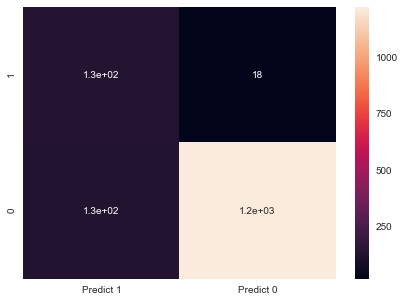

In [29]:
cm=metrics.confusion_matrix(y_test, pred_test, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [30]:
#Accuracy score for train and test data
print('Accuracy score for train data:', metrics.accuracy_score(y_train,pred_train))
print('Accuracy score for test data:', metrics.accuracy_score(y_test,pred_test))

Accuracy score for train data: 0.9037142857142857
Accuracy score for test data: 0.9026666666666666


In [31]:
##Both Train and Test data gives 96% accuracy

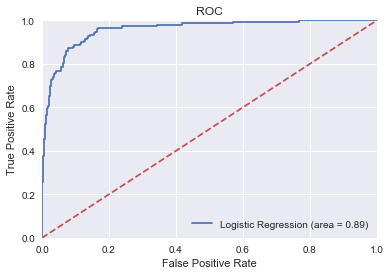

In [32]:
#Lets plot AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, pred_test)
fpr, tpr, thresholds = roc_curve(y_test, logisticReg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [33]:
#######Building Naive Bayes MODEL ####

In [34]:
#Splitting traing and test data
X = cdata.drop(['Education_Undergrad','Personal Loan'], axis = 1)
Y = cdata['Personal Loan']

#X = pd.get_dummies(X)
X.head()

,Age,Experience,Income,Family,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Education_Graduate,Education_Profssional
0,25,1,49,4,1.6,0,1,0,0,0,0,0
1,45,19,34,3,1.5,0,1,0,0,0,0,0
2,39,15,11,1,1.0,0,0,0,0,0,0,0
3,35,9,100,1,2.7,0,0,0,0,0,1,0
4,35,8,45,4,1.0,0,0,0,0,1,1,0


In [35]:
#Assigning train and test data
X_NB_train, X_NB_test, y_NB_train, y_NB_test = train_test_split(X, Y, test_size=0.30, random_state=1)

In [36]:
NB_model = GaussianNB()
NB_model.fit(X_NB_train, y_NB_train)

GaussianNB(priors=None)

In [37]:
#Score of the train and test data
score = NB_model.score(X_NB_train, y_NB_train)
score = NB_model.score(X_NB_test, y_NB_test)
print('Train data score:',score)
print('Test data score:',score)

Train data score: 0.8746666666666667
Test data score: 0.8746666666666667


In [38]:
#Predict for train dataset
pred_NB_train = NB_model.predict(X_NB_train)

from sklearn.metrics import classification_report,confusion_matrix
NB_mat_train = confusion_matrix(y_NB_train,pred_NB_train)

print("confusion matrix = \n",NB_mat_train)

confusion matrix = 
 [[2915  254]
 [ 134  197]]


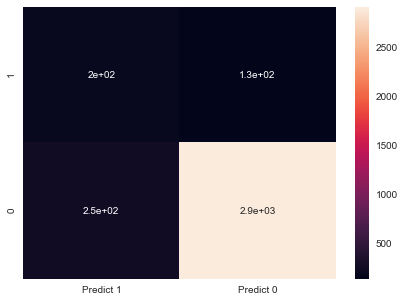

In [39]:
cm=metrics.confusion_matrix(y_NB_train, pred_NB_train, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [40]:
#Predict for test dataset
pred_NB_test = NB_model.predict(X_NB_test)

NB_mat_test = confusion_matrix(y_NB_test,pred_NB_test)

print("confusion matrix = \n",NB_mat_test)

confusion matrix = 
 [[1228  123]
 [  65   84]]


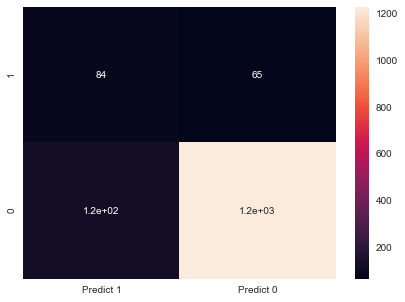

In [41]:
cm=metrics.confusion_matrix(y_NB_test, pred_NB_test, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [42]:
#Accuracy score for train and test data
print('Accuracy score for train data:', metrics.accuracy_score(y_NB_train,pred_NB_train))
print('Accuracy score for test data:', metrics.accuracy_score(y_NB_test,pred_NB_test))

Accuracy score for train data: 0.8891428571428571
Accuracy score for test data: 0.8746666666666667


In [43]:
#Both train and test data performs well but accuracy is not as good Logistic Model

In [44]:
###Building K-NN model

In [45]:
#Splitting traing and test data
X = cdata.drop(['Education_Undergrad','Personal Loan'], axis = 1)
#X = pd.get_dummies(X)
Y = cdata['Personal Loan']

from scipy.stats import zscore
XScaled  = X.apply(zscore)

XScaled.describe()

,Age,Experience,Income,Family,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Education_Graduate,Education_Profssional
count,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03
mean,2.478018e-17,-1.693312e-16,1.939449e-16,7.850609e-16,-2.078338e-17,2.810197e-16,5.092149e-16,4.426903e-16,2.986500e-16,-3.697931e-16,-2.122302e-16,-3.148592e-17
std,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00
min,-1.948906e+00,-2.014911e+00,-1.428969e+00,-1.216855e+00,-1.108987e+00,-5.555239e-01,-3.414233e-01,-2.535403e-01,-1.216618e+00,-6.453143e-01,-6.245376e-01,-6.549654e-01
25%,-9.019702e-01,-8.812043e-01,-7.554825e-01,-1.216855e+00,-7.084116e-01,-5.555239e-01,-3.414233e-01,-2.535403e-01,-1.216618e+00,-6.453143e-01,-6.245376e-01,-6.549654e-01
50%,-2.952359e-02,-9.121982e-03,-2.123482e-01,-3.454321e-01,-2.506106e-01,-5.555239e-01,-3.414233e-01,-2.535403e-01,8.219509e-01,-6.453143e-01,-6.245376e-01,-6.549654e-01
75%,8.429230e-01,8.629604e-01,5.263146e-01,5.259909e-01,3.216407e-01,4.375576e-01,-3.414233e-01,-2.535403e-01,8.219509e-01,1.549632e+00,1.601185e+00,1.526798e+00
max,1.889859e+00,1.996667e+00,3.263712e+00,1.397414e+00,4.613525e+00,5.688108e+00,2.928915e+00,3.944146e+00,8.219509e-01,1.549632e+00,1.601185e+00,1.526798e+00


In [46]:
#Assigning train and test data
X_KNN_train, X_KNN_test, y_KNN_train, y_KNN_test = train_test_split(XScaled, Y, test_size=0.30, random_state=1)

In [47]:
####Checking Optimal K value
kValues = list(range(1,20))

neighbors = list(filter(lambda x: x % 2 != 0, kValues))

# empty list that will hold accuracy scores
accuracy_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_KNN_train, y_KNN_train)
    y_KNN_pred = knn.predict(X_KNN_test)
    scores = metrics.accuracy_score(y_KNN_test, y_KNN_pred)
    accuracy_scores.append(scores)

#Misclassification error
MSE = [1 - x for x in accuracy_scores]

#Optimal K values
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal for K is %d" % optimal_k)

The optimal for K is 3


In [48]:
##Optimal K value is 3. So we will proceed with 3.

In [49]:
knn_model = KNeighborsClassifier(n_neighbors = 3)
knn_model.fit(X_KNN_train, y_KNN_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [50]:
#Score of the train and test data
score = NB_model.score(X_KNN_train, y_KNN_train)
score = NB_model.score(X_KNN_test, y_KNN_test)
print('Train data score:',score)
print('Test data score:',score)

Train data score: 0.8946666666666667
Test data score: 0.8946666666666667


In [51]:
#Predict for train dataset
pred_KNN_train = NB_model.predict(X_KNN_train)

from sklearn.metrics import classification_report,confusion_matrix
KNN_mat_train = confusion_matrix(y_KNN_train,pred_KNN_train)

print("confusion matrix = \n",KNN_mat_train)

confusion matrix = 
 [[3053  116]
 [ 228  103]]


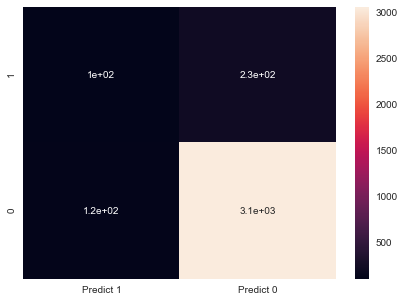

In [52]:
cm=metrics.confusion_matrix(y_KNN_train, pred_KNN_train, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [53]:
#Predict for test dataset
pred_KNN_test = NB_model.predict(X_KNN_test)

from sklearn.metrics import classification_report,confusion_matrix
KNN_mat_test = confusion_matrix(y_KNN_test,pred_KNN_test)

print("confusion matrix = \n",KNN_mat_test)

confusion matrix = 
 [[1305   46]
 [ 112   37]]


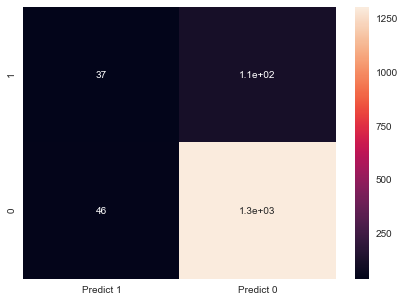

In [54]:
cm=metrics.confusion_matrix(y_KNN_test, pred_KNN_test, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [55]:
#Accuracy score for train and test data
print('Accuracy score for train data:', metrics.accuracy_score(y_KNN_train,pred_KNN_train))
print('Accuracy score for test data:', metrics.accuracy_score(y_KNN_test,pred_KNN_test))

Accuracy score for train data: 0.9017142857142857
Accuracy score for test data: 0.8946666666666667


In [56]:
#Both train and test data performs well but accuracy is lesser than Logistic model

In [57]:
##Overall Summary
print('OVERALL SUMMARY:')
print('Accuracy score for train data in Logistic Model:', metrics.accuracy_score(y_train,pred_train))
print('Accuracy score for test data in Logistic Model:', metrics.accuracy_score(y_test,pred_test))
print('Recall score for train data in Logistic Model:', metrics.recall_score(y_train,pred_train))
print('Recall score for test data in Logistic Model:', metrics.recall_score(y_test,pred_test))
print('=======================================')
print('Accuracy score for train data in Naive Bayes Model:', metrics.accuracy_score(y_NB_train,pred_NB_train))
print('Accuracy score for test data in Naive Bayes Model:', metrics.accuracy_score(y_NB_test,pred_NB_test))
print('Recall score for train data in Naive Bayes Model:', metrics.recall_score(y_NB_train,pred_NB_train))
print('Recall score for test data in Naive Bayes Model:', metrics.recall_score(y_NB_test,pred_NB_test))
print('=======================================')
print('Accuracy score for train data in KNN Model:', metrics.accuracy_score(y_KNN_train,pred_KNN_train))
print('Accuracy score for test data in KNN Model:', metrics.accuracy_score(y_KNN_test,pred_KNN_test))
print('Recall score for train data in KNN Model:', metrics.recall_score(y_KNN_train,pred_KNN_train))
print('Recall score for test data in KNN Model:', metrics.recall_score(y_KNN_test,pred_KNN_test))

OVERALL SUMMARY:
Accuracy score for train data in Logistic Model: 0.9037142857142857
Accuracy score for test data in Logistic Model: 0.9026666666666666
Recall score for train data in Logistic Model: 0.9093655589123867
Recall score for test data in Logistic Model: 0.8791946308724832
Accuracy score for train data in Naive Bayes Model: 0.8891428571428571
Accuracy score for test data in Naive Bayes Model: 0.8746666666666667
Recall score for train data in Naive Bayes Model: 0.595166163141994
Recall score for test data in Naive Bayes Model: 0.5637583892617449
Accuracy score for train data in KNN Model: 0.9017142857142857
Accuracy score for test data in KNN Model: 0.8946666666666667
Recall score for train data in KNN Model: 0.311178247734139
Recall score for test data in KNN Model: 0.2483221476510067


In [58]:
###So by above summary it is clear that Logistic Regression Model does well with given dataset. Accuracy came out to be maximum with logistic model. Also Recall looks better with Logistic model compare to others.
###The reason for Logistic Regression Model performed good in this case maybe due to natural probabilistic view of class predictions and easily expand to multiple classes in the given dataset.